In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train  = pd.read_csv("/kaggle/input/titanic/train.csv")
test  = pd.read_csv("/kaggle/input/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.head()
Name = train['Name'].str.split(',').tolist()
surname = [x[0] for x in Name]
surname = pd.Series(surname)
train['Surname'] = surname
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [4]:
import matplotlib.pyplot as plt


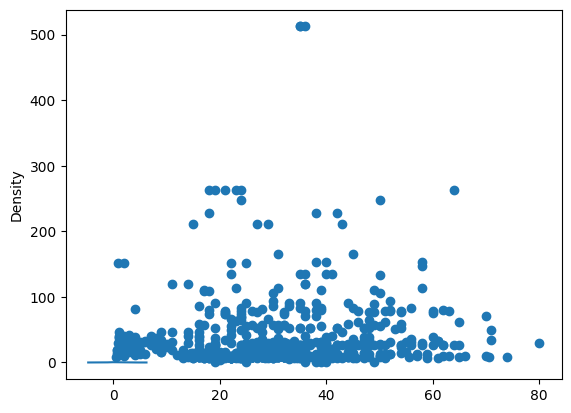

In [5]:
# train['Age'].plot(kind = 'bar')
standard = (train['Age']-train['Age'].mean())/train['Age'].std()
standard.plot(kind= 'kde')
# train.plot(kind = 'scatter', x = 'Age', y = 'Fare')
plt.scatter(x = train['Age'], y = train['Fare'])

In [6]:
Decks = train['Cabin'].str[0]
Decks.fillna(value = 'M',inplace = True)

In [7]:
train['Decks'] = Decks

In [8]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Decks
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Montvila,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Graham,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Johnston,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Behr,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Dooley,M


In [9]:
import seaborn as sns

In [10]:
pd.crosstab(columns= train['Pclass'], index =train['Survived'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [11]:
pd.crosstab(columns = train['Decks'], index = train['Survived'])

Decks,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,481,1
1,7,35,35,25,24,8,2,206,0


In [12]:
train[train['SibSp'] == train['SibSp'].max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Decks
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,M
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,M
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,M
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,M
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,M
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,M
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Sage,M


<Axes: >

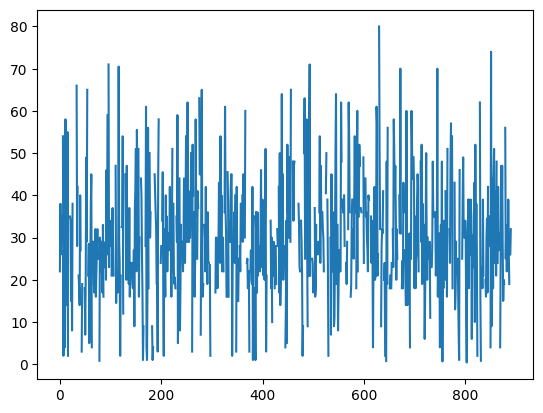

In [13]:
train['Age'].plot(kind = 'line')

In [14]:
train['Age'].head(50)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
20    35.0
21    34.0
22    15.0
23    28.0
24     8.0
25    38.0
26     NaN
27    19.0
28     NaN
29     NaN
30    40.0
31     NaN
32     NaN
33    66.0
34    28.0
35    42.0
36     NaN
37    21.0
38    18.0
39    14.0
40    40.0
41    27.0
42     NaN
43     3.0
44    19.0
45     NaN
46     NaN
47     NaN
48     NaN
49    18.0
Name: Age, dtype: float64

In [15]:
true_fare = train['Fare']/(train['SibSp'] + train['Parch'] +1)

In [16]:
train['Individual_Fare'] = true_fare

In [17]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Decks,Individual_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,M,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,C,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,M,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,C,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,M,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,M,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,B,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,M,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,C,30.00000


In [18]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual_Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,19.916375
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,7.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,8.300000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,512.329200


In [19]:
train[train['Individual_Fare']>train['Individual_Fare'].mean()][['Survived','Decks']].value_counts()

Survived  Decks
0         M        35
1         B        34
          C        34
          M        27
0         C        23
1         D        18
          E        18
0         B         9
          A         7
          D         7
          E         7
1         A         6
0         T         1
Name: count, dtype: int64

In [20]:
train[train['Decks'] ==  'B'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual_Fare
count,47.000000,47.000000,47.0,45.000000,47.000000,47.000000,47.000000,47.000000
mean,521.808511,0.744681,1.0,34.955556,0.361702,0.574468,113.505764,69.379566
std,252.725116,0.440755,0.0,15.491868,0.568198,0.773043,109.301500,83.283106
min,32.000000,0.000000,1.0,11.000000,0.000000,0.000000,0.000000,0.000000
25%,306.000000,0.500000,1.0,24.000000,0.000000,0.000000,57.000000,28.744800
50%,540.000000,1.000000,1.0,33.000000,0.000000,0.000000,80.000000,33.500000
75%,744.500000,1.000000,1.0,44.000000,1.000000,1.000000,120.000000,83.250000
max,888.000000,1.000000,1.0,70.000000,2.000000,2.000000,512.329200,512.329200


In [21]:
train[train['Decks'] ==  'D'].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Individual_Fare
count,33.000000,33.000000,33.000000,31.000000,33.000000,33.000000,33.000000,33.000000
mean,475.939394,0.757576,1.121212,39.032258,0.424242,0.303030,57.244576,34.384263
std,266.218066,0.435194,0.331434,14.460253,0.501890,0.585494,29.592832,17.897014
min,22.000000,0.000000,1.000000,16.000000,0.000000,0.000000,12.875000,8.761100
25%,249.000000,1.000000,1.000000,25.000000,0.000000,0.000000,30.000000,25.929200
50%,497.000000,1.000000,1.000000,37.000000,0.000000,0.000000,53.100000,32.320800
75%,682.000000,1.000000,1.000000,50.000000,1.000000,0.000000,77.287500,38.979150
max,872.000000,1.000000,2.000000,63.000000,1.000000,2.000000,113.275000,77.958300


In [22]:
train[['Individual_Fare','Fare','Parch','SibSp']].corr()

,Individual_Fare,Fare,Parch,SibSp
Individual_Fare,1.000000,0.840995,-0.068978,-0.094682
Fare,0.840995,1.000000,0.216225,0.159651
Parch,-0.068978,0.216225,1.000000,0.414838
SibSp,-0.094682,0.159651,0.414838,1.000000


In [23]:
total_family = train['Parch']+train['SibSp']+1

In [24]:
train['Total_family'] = total_family

In [25]:
train['alone'] = [1 if x == 1 else 0 for x in train['Total_family']]

In [26]:
train[train['Decks']=="B"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Decks,Individual_Fare,Total_family,alone
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,Spencer,B,73.260400,2,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,Ostby,B,30.989600,2,0
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,B,80.000000,1,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,Baxter,B,123.760400,2,0
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C,Giglio,B,79.200000,1,1
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,Van der hoef,B,33.500000,1,1
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C,Brown,B,27.720800,1,1
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,Lurette,B,146.520800,1,1
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,Cherry,B,86.500000,1,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,Harrison,B,0.000000,1,1


In [27]:
train.fillna(value = -100,inplace = True)

In [28]:
condition = train['Age'] == -100
train['Age_missing'] = [1 if x ==-100 else 0 for x in train['Age']]  

In [29]:
train['Age'] = [train['Age'].mean().round() if x == -100 else x for x in train['Age']]

In [30]:
X = train.drop(columns = ['Ticket','Cabin','Fare','PassengerId','Survived'])

In [31]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Surname,Decks,Individual_Fare,Total_family,alone,Age_missing
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Braund,M,3.62500,2,0,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Cumings,C,35.64165,2,0,0
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Heikkinen,M,7.92500,1,1,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Futrelle,C,26.55000,2,0,0
4,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Allen,M,8.05000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,S,Montvila,M,13.00000,1,1,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,S,Graham,B,30.00000,1,1,0
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,4.0,1,2,S,Johnston,M,5.86250,4,0,1
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,C,Behr,C,30.00000,1,1,0


In [32]:
y = train['Survived']

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import cross_validate


In [34]:
X.drop(columns = ['Name'], inplace = True)

In [35]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked,Surname,Decks,Individual_Fare,Total_family,alone,Age_missing
0,3,male,22.0,1,0,S,Braund,M,3.62500,2,0,0
1,1,female,38.0,1,0,C,Cumings,C,35.64165,2,0,0
2,3,female,26.0,0,0,S,Heikkinen,M,7.92500,1,1,0
3,1,female,35.0,1,0,S,Futrelle,C,26.55000,2,0,0
4,3,male,35.0,0,0,S,Allen,M,8.05000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,S,Montvila,M,13.00000,1,1,0
887,1,female,19.0,0,0,S,Graham,B,30.00000,1,1,0
888,3,female,4.0,1,2,S,Johnston,M,5.86250,4,0,1
889,1,male,26.0,0,0,C,Behr,C,30.00000,1,1,0


In [36]:
transforming_columns = X.select_dtypes(include = ['object']).columns.tolist()
non_transforming_columns = X.select_dtypes(exclude = ['object']).columns.tolist()
X[transforming_columns] = X[transforming_columns].astype(str)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [38]:
X[transforming_columns].dtypes
numeric_columns = ['Age', 'Individual_Fare']
# print(transforming_columns)
# print(non_transforming_columns)
X.dtypes

Pclass               int64
Sex                 object
Age                float64
SibSp                int64
Parch                int64
Embarked            object
Surname             object
Decks               object
Individual_Fare    float64
Total_family         int64
alone                int64
Age_missing          int64
dtype: object

In [39]:
preprocess = ColumnTransformer([
    ('Non_numeric category',OrdinalEncoder(),transforming_columns),
    ('Numeric_category','passthrough', non_transforming_columns),
    ('Numeric_Scaled',MinMaxScaler(),numeric_columns)
    ],
)
preprocess

ColumnTransformer(transformers=[('Non_numeric category', OrdinalEncoder(),
                                 ['Sex', 'Embarked', 'Surname', 'Decks']),
                                ('Numeric_category', 'passthrough',
                                 ['Pclass', 'Age', 'SibSp', 'Parch',
                                  'Individual_Fare', 'Total_family', 'alone',
                                  'Age_missing']),
                                ('Numeric_Scaled', MinMaxScaler(),
                                 ['Age', 'Individual_Fare'])])

In [40]:
# pipeline = Pipeline(steps = [('preprocess',ColumnTransformer()])

In [41]:
transformed = preprocess.fit_transform(X)

In [42]:
clf = LogisticRegression(max_iter = 500)
score = cross_validate(clf,transformed,y,cv = 5)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [43]:
score['test_score'].mean()

0.7845395769254913

In [44]:
transformed2 = preprocess.fit_transform(X_train)

In [45]:
clf.fit(transformed2,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [46]:
clf.score(transformed2, y_train)

0.8019662921348315

In [47]:
transformed3 = preprocess.fit_transform(X_test)

In [48]:
clf.score(transformed3, y_test)

0.7821229050279329

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()
model.fit(transformed,y)

DecisionTreeClassifier()

In [51]:
model.score(transformed,y)

0.9988776655443322

In [52]:
model.score(transformed2,y_train)

0.875

In [53]:
model.score(transformed3,y_test)

0.8435754189944135

In [54]:
model.fit(transformed2,y_train)

DecisionTreeClassifier()

In [55]:
model.score(transformed3,y_test)

0.6815642458100558

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model = RandomForestClassifier(max_depth = 11,)
model.fit(transformed, y)

RandomForestClassifier(max_depth=11)

In [58]:
model.score(transformed,y)

0.9663299663299664

In [59]:
model.score(transformed2,y_train)

0.9508426966292135

In [60]:
model.score(transformed3,y_test)

0.9050279329608939

In [61]:
model.fit(transformed2,y_train)

RandomForestClassifier(max_depth=11)

In [62]:
model.score(transformed2,y_train)

0.9634831460674157

In [63]:
model.score(transformed3,y_test)

0.770949720670391

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
classifier = RandomForestClassifier()
parameters = {
    'n_estimators' :[100,110,120],
    'max_depth':[10,11,12],
    'min_samples_split' :[1,2,3],
    'max_features' : ['sqrt','log2'],
}
best_model = GridSearchCV(classifier,parameters)

In [66]:
best_model.fit(transformed,y)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/util

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 110, 120]})

In [67]:
best_model.best_params_

{'max_depth': 11,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 120}

In [68]:
classifier = RandomForestClassifier(max_depth = 11,max_features = 'log2',min_samples_split = 2,n_estimators = 120)

In [69]:
classifier.fit(transformed2,y_train)

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=120)

In [70]:
classifier.score(transformed3,y_test)

0.776536312849162

In [71]:
classifier.score(transformed2,y_train)

0.9676966292134831

In [72]:
classifier.score(transformed,y)

0.9259259259259259

In [73]:
classifier.n_classes_

2

In [74]:
pipeline = Pipeline(steps = [
    ('data preprocess',preprocess),
    ('Classifier',RandomForestClassifier(max_depth = 11,min_samples_split = 2, max_features = 'log2', n_estimators = 120))
])

In [75]:
transformed = preprocess.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(transformed,y,random_state = 45, test_size = 0.2)

In [77]:
model = RandomForestClassifier(max_depth = 11,min_samples_split = 2, max_features = 'log2', n_estimators = 120)

In [78]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_features='log2', n_estimators=120)

In [79]:
model.score(X_test, y_test)

0.8603351955307262

In [80]:
from lightgbm import LGBMClassifier

In [81]:
model = LGBMClassifier()

In [82]:
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 280, number of negative: 432
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 807
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393258 -> initscore=-0.433636
[LightGBM] [Info] Start training from score -0.433636
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier()

In [83]:
y_pred = model.predict(X_test)

In [84]:
model.score(X_test,y_test)

0.8603351955307262

In [85]:
from xgboost import XGBClassifier

In [86]:
model = XGBClassifier(learning_rate = 0.05, n_estimators = 110,gamma = 0.05, reg_lambda = 0.5)

In [87]:
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
model.score(X_test, y_test)

0.8770949720670391